# <center>EXPLORATARY DATA ANALYSIS ON MARYLAND TRAFFIC DATASET</center>



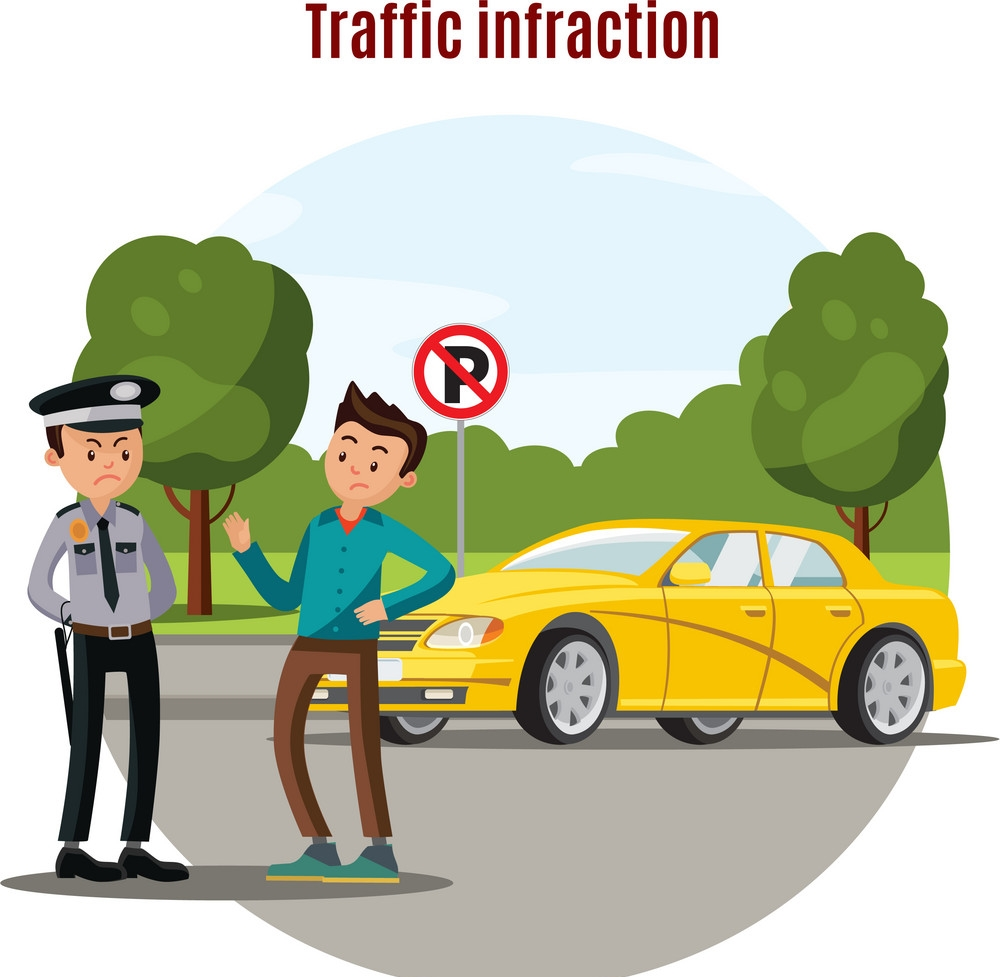

<center>This project's dataset focuses on the traffic violations that has been committed in Maryland during the years 2005-2011. We take a deeper dive in this dataset using in-built python libraries to uncover the hidden information and interpret it using interesting graphs.</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
!pip install jovian opendatasets --upgrade --quiet
import jovian

# CLEANING AND PREPARING THE DATASET FOR ANALYSIS

In [2]:
x_df = pd.read_csv('traffic_violaions.csv',skipinitialspace=True)
x_df

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,01-02-2005,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10-05-2011,01:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10-05-2011,06:43,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10-05-2011,06:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10-05-2011,07:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


First, we change the Nan values from the original dataset and create a variable to contain the copy of it so as to not to disturb or change the values in original dataset further

In [3]:
x_df.fillna(value='not identified',inplace=True)
x_df
main_data_df = x_df.copy(deep=True)
main_data_df

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,01-02-2005,01:55,not identified,M,1985.0,20.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False
1,1/18/2005,08:15,not identified,M,1965.0,40.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False
2,1/23/2005,23:15,not identified,M,1972.0,33.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False
3,2/20/2005,17:15,not identified,M,1986.0,19.0,White,Call for Service,Other,False,not identified,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,not identified,F,1984.0,21.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10-05-2011,01:55,not identified,not identified,not identified,not identified,not identified,not identified,not identified,False,not identified,not identified,not identified,not identified,False
52962,10-05-2011,06:43,not identified,M,1986.0,25.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False
52963,10-05-2011,06:49,not identified,not identified,not identified,not identified,not identified,not identified,not identified,False,not identified,not identified,not identified,not identified,False
52964,10-05-2011,07:19,not identified,F,1986.0,25.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False


We delete the last row since it has no values in it

In [4]:
main_data_df.drop(52965,axis = 0,inplace=True)

We convert the data type of stop_date column to datetime so as to access each balues according to respective years,months or days

In [5]:
main_data_df['stop_date'] = pd.to_datetime(main_data_df.stop_date,errors = 'coerce')
main_data_df['stop_time'] = pd.to_datetime(main_data_df.stop_time,format = '%H:%M').dt.time
main_data_df['year'] = pd.DatetimeIndex(main_data_df.stop_date).year
main_data_df['weekday'] = pd.DatetimeIndex(main_data_df.stop_date).weekday
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52965 entries, 0 to 52964
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           52965 non-null  datetime64[ns]
 1   stop_time           52965 non-null  object        
 2   country_name        52965 non-null  object        
 3   driver_gender       52965 non-null  object        
 4   driver_age_raw      52965 non-null  object        
 5   driver_age          52965 non-null  object        
 6   driver_race         52965 non-null  object        
 7   violation_raw       52965 non-null  object        
 8   violation           52965 non-null  object        
 9   search_conducted    52965 non-null  object        
 10  search_type         52965 non-null  object        
 11  stop_outcome        52965 non-null  object        
 12  is_arrested         52965 non-null  object        
 13  stop_duration       52965 non-null  object    

# ANALYSING THE DATASET   # 

We try to create a bar chart using violations column to check which violation is the most common.

In [6]:
violations_frequency_series = main_data_df.violation.value_counts()
violations_frequency_df = violations_frequency_series.to_frame()
violations_frequency_df

,violation
Speeding,32139
Moving violation,8385
Equipment,4276
not identified,3384
Other,2961
Registration/plates,1820


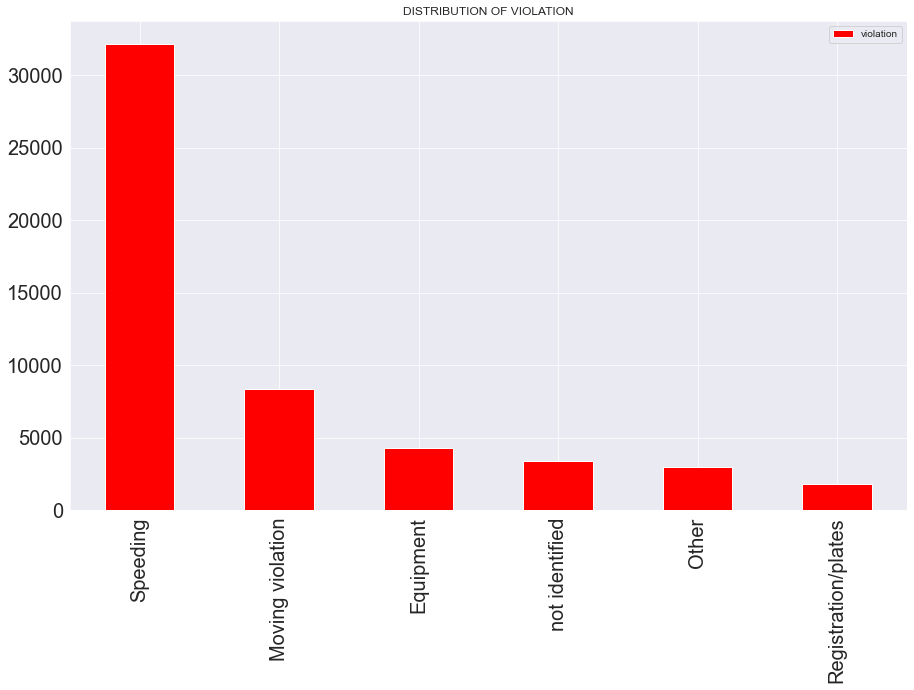

In [7]:
sns.set_style('darkgrid')
violations_frequency_df.plot(kind='bar',title='DISTRIBUTION OF VIOLATION',figsize = (15,9),fontsize=20,color = 'red');


In [8]:
stop_seriers = main_data_df.stop_outcome.value_counts()
stop_outcome_df = stop_seriers.to_frame()
stop_outcome_df

,stop_outcome
Citation,45931
not identified,3384
Arrest Driver,1669
Warning,1148
N/D,348
No Action,285
Arrest Passenger,200


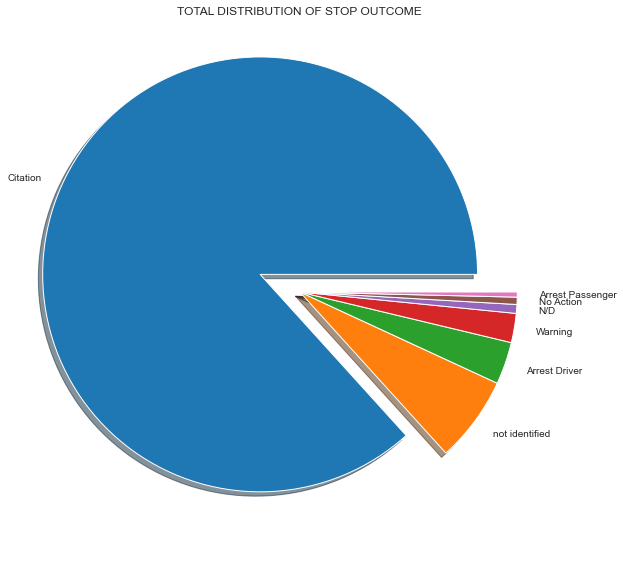

In [9]:
plt.figure(figsize = (20,10))
my_explode = [0.2,0,0,0,0,0,0]
plt.rcParams.update({'font.size': 10})
plt.pie(x = 'stop_outcome',labels = stop_outcome_df.index,shadow = True, data = stop_outcome_df,explode =my_explode)
plt.title('TOTAL DISTRIBUTION OF STOP OUTCOME');


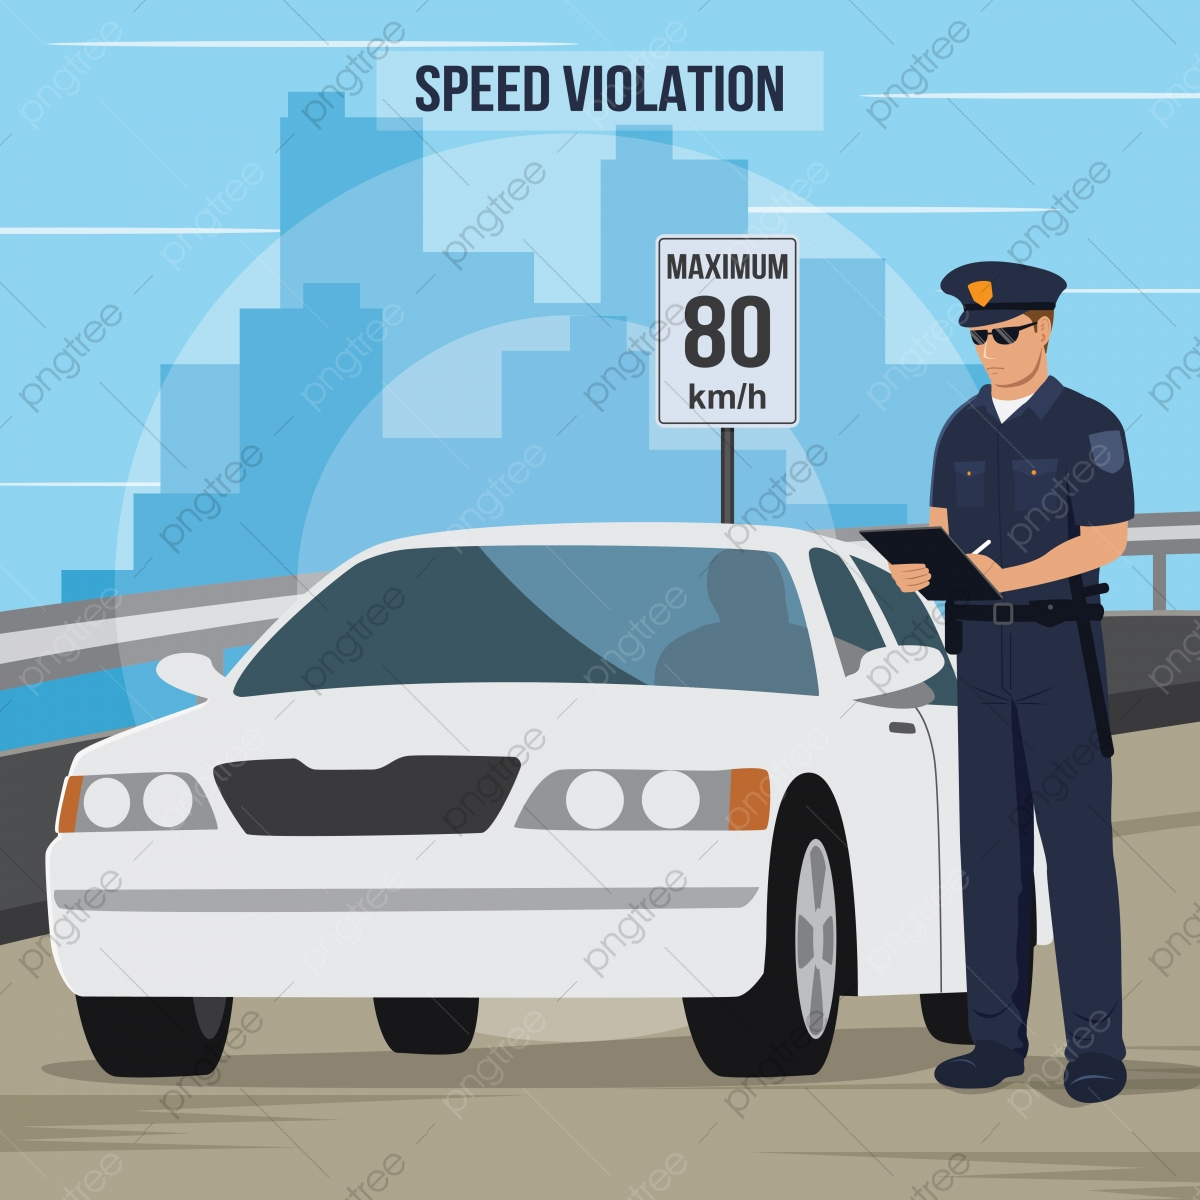


We are replacing "not identified" value in driver_age column since we cannot plot strings as values

In [10]:
main_data_df.driver_age.replace(to_replace='not identified',value = 0,inplace=True)
main_data_df

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,weekday
0,2005-01-02,01:55:00,not identified,M,1985.0,20.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False,2005,6
1,2005-01-18,08:15:00,not identified,M,1965.0,40.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False,2005,1
2,2005-01-23,23:15:00,not identified,M,1972.0,33.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False,2005,6
3,2005-02-20,17:15:00,not identified,M,1986.0,19.0,White,Call for Service,Other,False,not identified,Arrest Driver,True,16-30 Min,False,2005,6
4,2005-03-14,10:00:00,not identified,F,1984.0,21.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52960,2011-10-05,01:55:00,not identified,not identified,not identified,0.0,not identified,not identified,not identified,False,not identified,not identified,not identified,not identified,False,2011,2
52961,2011-10-05,01:55:00,not identified,not identified,not identified,0.0,not identified,not identified,not identified,False,not identified,not identified,not identified,not identified,False,2011,2
52962,2011-10-05,06:43:00,not identified,M,1986.0,25.0,White,Speeding,Speeding,False,not identified,Citation,False,0-15 Min,False,2011,2
52963,2011-10-05,06:49:00,not identified,not identified,not identified,0.0,not identified,not identified,not identified,False,not identified,not identified,not identified,not identified,False,2011,2


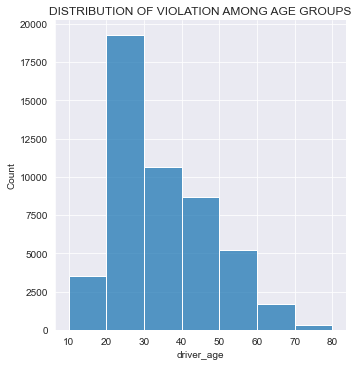

In [11]:
matplotlib.rcParams['figure.figsize'] = 20,20
sns.displot(main_data_df.driver_age,bins = [10,20,30,40,50,60,70,80])

plt.title('DISTRIBUTION OF VIOLATION AMONG AGE GROUPS');

In [12]:
time_frequency_series  = main_data_df.groupby(['stop_time']).size()
time_frequency_df = time_frequency_series.to_frame()
time_frequency_df.rename(columns = {0:'count'},inplace= True)
time_frequency_df

,count
stop_time,
00:00:00,117
00:01:00,50
00:02:00,42
00:03:00,40
00:04:00,47
...,...
23:55:00,129
23:56:00,51
23:57:00,40


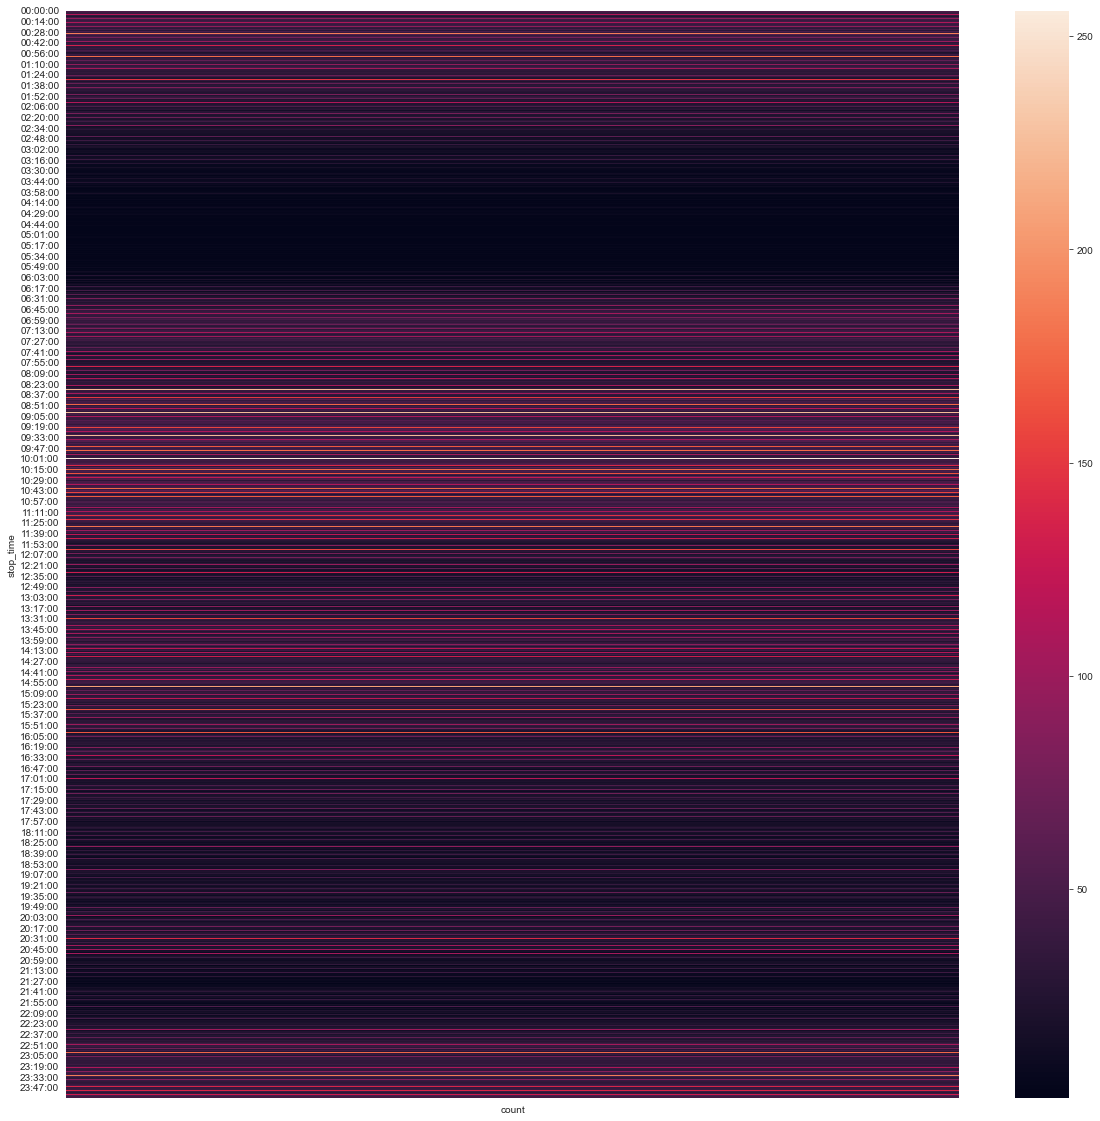

In [13]:
sns.heatmap(data = time_frequency_df);

In [14]:
year_s = main_data_df.groupby(['year']).size()
year_df = year_s.to_frame()
year_df

,0
year,
2005,2558
2006,10639
2007,9476
2008,8752
2009,7908
2010,7561
2011,6071


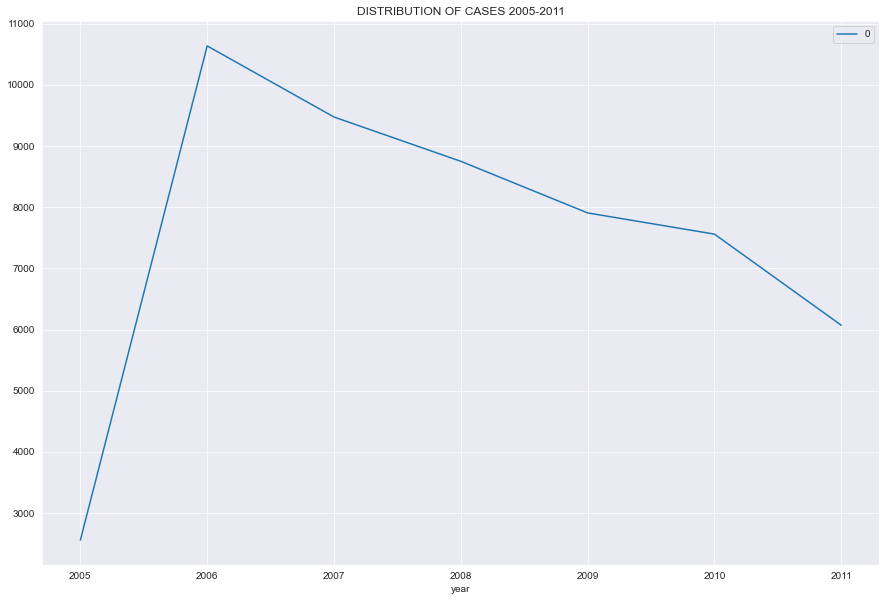

In [15]:
matplotlib.rcParams['figure.figsize'] = 15,10
year_df.plot(kind='line')
plt.title('DISTRIBUTION OF CASES 2005-2011');


# INTERPRETING THE DATASET

1.Which is the most common violation?
* From the bar chart,we can see that speeding has the highest value counts or occurs more frequent than other violations.This can be due to the fact that most violators are in the age group of 20-30,which is shown by the distribution plot,since this group is likely to be on a tight schedule.As a result,the drivers resort to aggressive driving and end up as traffic violators.
2.What is the common outcome for this law breakers?
* Getting tickets(citations) from police officers is the usual outcome for violators,as we can see from the pie chart.Also the share of no action in this pie chart shows that the chances of bribing and corruption is on the lower side.
3.Which age group is recurring in this dataset?
* People within the age bracket of 20-30 are the most common violaters.This is general since this age group majorily contributes towards vechile ownership and use them frequently for many occasions.
4.Time where most number of violations frequently occur?
* As we can see from the heatmap,early morning is the sweet spot for most traffic violations to occur.A trend also occurs in night but is not as prominent as the trend in early morning.This trend when compared with the working population's morning shift hours,which is the most common shift, is similar.can be further used to corroborate the above finding.
5.How is the direction is the trend of total cases moving across different years?
* We can see a sharp dip of total cases from 2006.This can be attributed to introduction of new and strict rules or laws(like the law passed in 2009,which stated that texting and driving is illegal) and imposition of hefty fines on rule breakers.


# DRAWBACKS OF THIS DATASET

Since this dataset contains information from an American country, this is a biased dataset where the driver's race is mostly white.

# SOURCE

* DATASET FROM :https://www.kaggle.com/shubamsumbria/traffic-violations-exploratory-data-analysis

In [19]:
jovian.commit(project = 'EXPLORATART DATA ANALYSIS ON MARYLAND TRAFFIC DATASET')

<IPython.core.display.Javascript object>

[jovian] Creating a new project "12401anuj-b/EXPLORATART DATA ANALYSIS ON MARYLAND TRAFFIC DATASET"
[jovian] Committed successfully! https://jovian.ai/12401anuj-b/exploratart-data-analysis-on-maryland-traffic-dataset


'https://jovian.ai/12401anuj-b/exploratart-data-analysis-on-maryland-traffic-dataset'